In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Basic feedforward model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattening the 28x28 images to 784
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8692 - loss: 0.4443 - val_accuracy: 0.9657 - val_loss: 0.1232
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1107 - val_accuracy: 0.9738 - val_loss: 0.0929
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0727 - val_accuracy: 0.9762 - val_loss: 0.0901
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9845 - loss: 0.0520 - val_accuracy: 0.9755 - val_loss: 0.0845
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9863 - loss: 0.0419 - val_accuracy: 0.9737 - val_loss: 0.0920
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.9778 - val_loss: 0.0834
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 0.9773 - val_loss: 0.0845
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9926 - loss: 0.0224

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1160
Test Accuracy: 0.9778


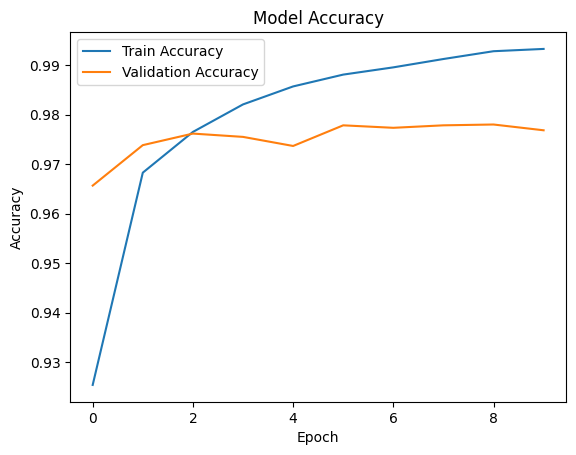

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

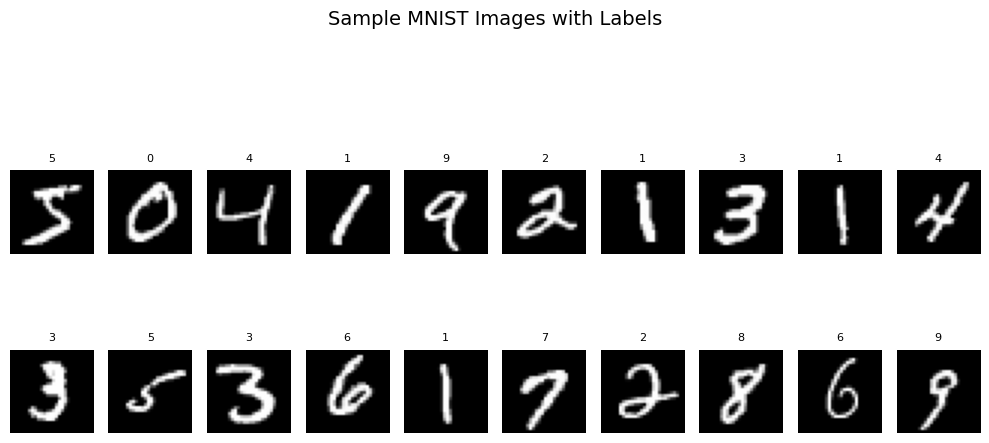

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Flatten and normalize images
train_images = train_images.reshape((60000, 28 * 28)) / 255.0
test_images = test_images.reshape((10000, 28 * 28)) / 255.0

# Plot first 20 images with labels
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"{train_labels[i]}", fontsize=8)
    plt.axis('off')

plt.suptitle('Sample MNIST Images with Labels', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to build an improved model
def build_improved_model(neurons, name):
    model = Sequential(name=name)
    model.add(Flatten(input_shape=(28, 28)))

    # First hidden layer
    model.add(Dense(neurons, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Try with improved architecture and more training epochs
neuron_options = {
    "Model_Improved_128": 128,
    "Model_Improved_256": 256
}

histories = {}

# Use EarlyStopping to avoid overfitting
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

for name, neuron_count in neuron_options.items():
    print(f"\nTraining {name} with {neuron_count} neurons...")
    model = build_improved_model(neuron_count, name)
    history = model.fit(x_train, y_train,
                        epochs=15,
                        validation_split=0.1,
                        callbacks=[early_stop],
                        verbose=1)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f}")
    histories[name] = history



Training Model_Improved_128 with 128 neurons...
Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7925 - loss: 0.6803 - val_accuracy: 0.9627 - val_loss: 0.1288
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9240 - loss: 0.2573 - val_accuracy: 0.9713 - val_loss: 0.1029
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9389 - loss: 0.2049 - val_accuracy: 0.9713 - val_loss: 0.0936
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9466 - loss: 0.1740 - val_accuracy: 0.9747 - val_loss: 0.0848
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9519 - loss: 0.1587 - val_accuracy: 0.9757 - val_loss: 0.0813
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9564 - loss: 0.1427 - val_accuracy: 0.9770 - val_loss: 0.0709
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9584 - loss: 0.1352 - val_accuracy: 0.9787 - val_loss: 0.0695
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━

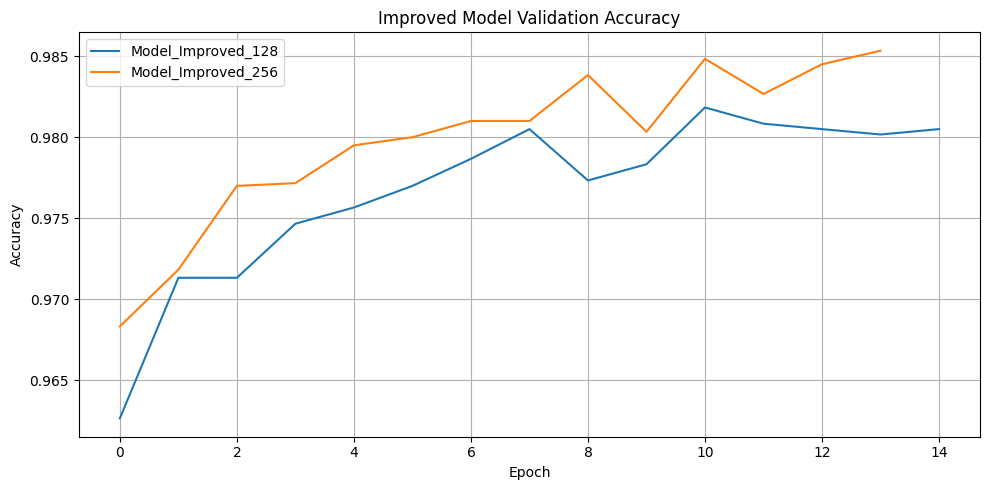

In [3]:
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Improved Model Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


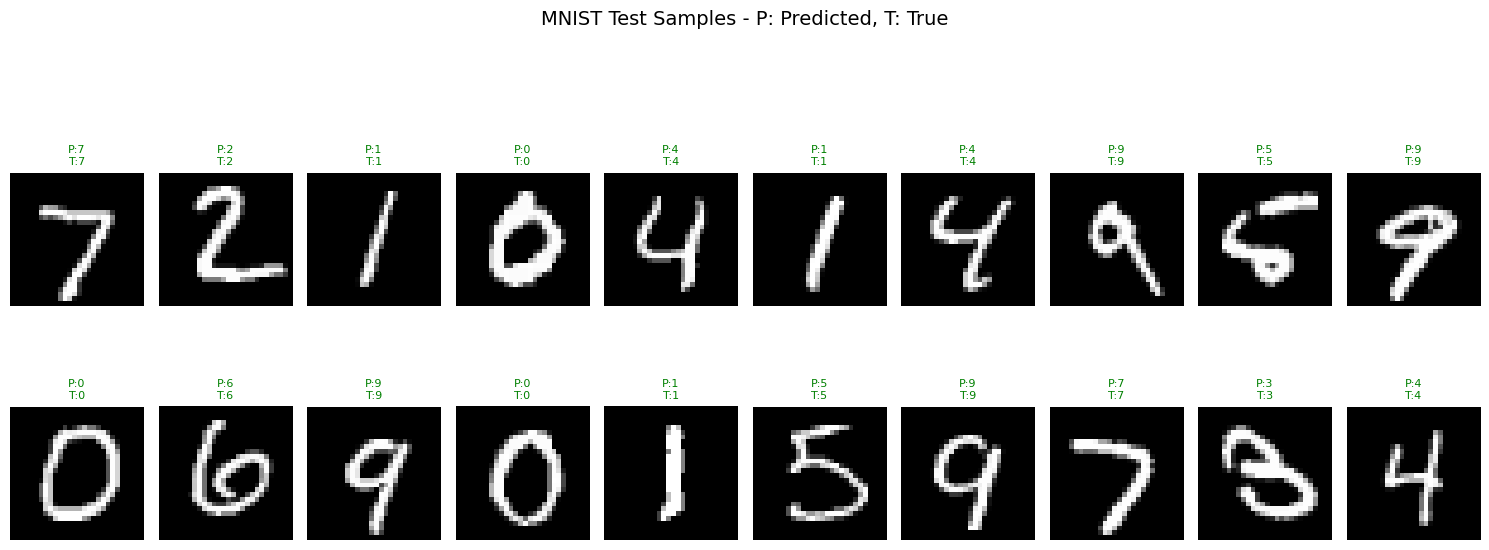

In [4]:
import numpy as np

# Use the last trained model (you can also specify which model if multiple)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show first 20 test images with predicted vs actual labels
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P:{predicted_labels[i]}\nT:{y_test[i]}", fontsize=8,
              color='green' if predicted_labels[i] == y_test[i] else 'red')
    plt.axis('off')
plt.suptitle("MNIST Test Samples - P: Predicted, T: True", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()